In [ ]:
# Models the expansion of a beam launched from a SMF

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# all units in um

mfd = 5 # 5-10 um for SMFs (poorer approximation NA 0.1 to 0.2, equiv. to ~5.5-11 degrees)
wavel = 1.55

In [5]:
def w_z(mfd, lambda_wavel, z):
    '''
    mfd: mode field diameter
    lambda_wavel: wavelength
    z: location on z-axis
    '''
    
    z_R = (np.pi/lambda_wavel) * ((mfd/2) ** 2)
    
    w_z = (mfd/2) * np.sqrt( 1 + np.power(np.divide(z,z_R),2) )
    
    return w_z

In [6]:
def I_norm(r,z,mfd,lambda_wavel):
    '''
    Normalized intensity of the Gaussian beam (i.e., total power is divided out)
    r: radius
    z: optical axis
    '''
    
    result = (2./(np.pi * np.power(w_z(mfd, lambda_wavel, z),2) )) * np.exp(np.divide(-2*np.power(r,2), np.power(w_z(mfd, lambda_wavel, z),2) ) )
    
    return result

In [11]:
z_array = np.arange(0,500)
#r_array = 5. #np.linspace(0,50)

test_w = w_z(mfd = mfd, lambda_wavel = wavel, z = z_array)
test_I0 = I_norm(r = 0, z = z_array, mfd = mfd, lambda_wavel = wavel)
test_I1 = I_norm(r = 5, z = z_array, mfd = mfd, lambda_wavel = wavel)
test_I2 = I_norm(r = 10, z = z_array, mfd = mfd, lambda_wavel = wavel)
test_I3 = I_norm(r = 15, z = z_array, mfd = mfd, lambda_wavel = wavel)

test_I4 = I_norm(r = 2.5e3, z = z_array, mfd = mfd, lambda_wavel = wavel)

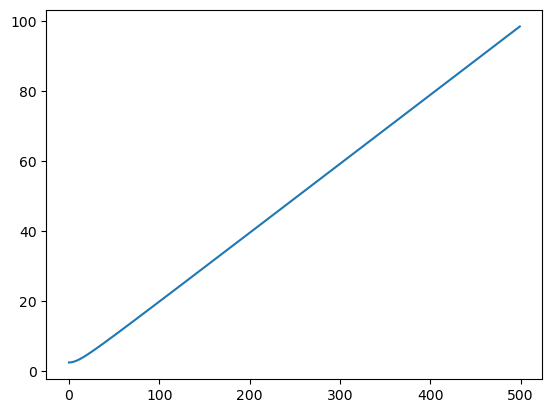

In [12]:
plt.plot(z_array, test_w)
plt.show()

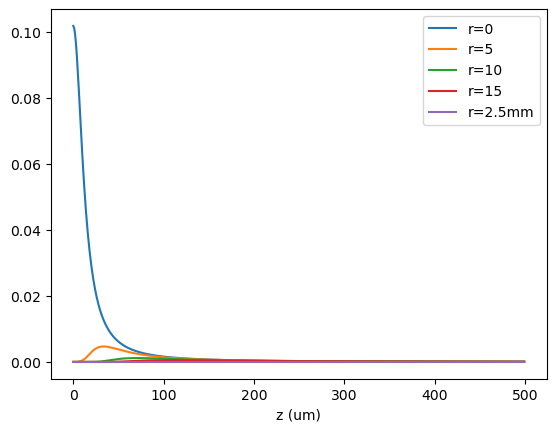

In [13]:
plt.plot(z_array, test_I0, label = 'r=0')
plt.plot(z_array, test_I1, label = 'r=5')
plt.plot(z_array, test_I2, label = 'r=10')
plt.plot(z_array, test_I3, label = 'r=15')
plt.plot(z_array, test_I4, label = 'r=2.5mm')
plt.xlabel('z (um)')
plt.legend()
plt.show()

In [8]:
# case of a beam expanding from an SMF, incident on an iris of r=2.5mm. What is the difference in intensity from the center of 
# the pupil formed by the iris and the edge, given a distance between the SMF and the iris of 2.5 mm (2.5e3 um)?

# (note there is no lens involved)

dist_smf_iris = 2.5e3
mfd = 5

I_center = I_norm(r = 0, z = dist_smf_iris, mfd = mfd, lambda_wavel = 1.55)
w_center = w_z(mfd = mfd, lambda_wavel = 1.55, z = dist_smf_iris)

I_edge = I_norm(r = 2.5e3, z = dist_smf_iris, mfd = mfd, lambda_wavel = 1.55)
w_edge = w_z(mfd = mfd, lambda_wavel = 1.55, z = dist_smf_iris)

print(I_center - I_edge)

2.6152024925460556e-06


In [17]:
# now conisder the iris to be replaced with a lens of 100 mm, so SMF/iris distance is 100e3

dist_smf_iris = 100e3
mfd = 5

I_center = I_norm(r = 0, z = dist_smf_iris, mfd = mfd, lambda_wavel = 1.55)
w_center = w_z(mfd = mfd, lambda_wavel = 1.55, z = dist_smf_iris)

I_edge = I_norm(r = 2.5e3, z = dist_smf_iris, mfd = mfd, lambda_wavel = 1.55)
w_edge = w_z(mfd = mfd, lambda_wavel = 1.55, z = dist_smf_iris)

print('Fractional difference in intensity, from center to edge of lens:')
print(I_center - I_edge)

# Consider also that the divergence angle in the far field is approx. 5.5 to 11 degrees (from MFD of 5 to 10 um)
# meaning that with a 100 mm lens placed 100 mm away, the incident light beam will have a radius of approx. 10 mm
# and we are stopping it down to to the central r~2.5 mm')

SyntaxError: unexpected character after line continuation character (2298306470.py, line 16)

In [21]:
I_edge

0.0